In [23]:
# price and size


import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
#In the previous project, we cleaned our data files one-by-one. 
#This isn't an issue when you're working with just three files, 
#but imagine if you had several hundred! One way to automate the data importing and cleaning process is by writing a **function**. 
#This will make sure that all our data undergoes the same process, 
#and that our analysis is easily reproducible — something that's very important in science in general and data science in particular. 

In [9]:
#Write a function named wrangle that takes a file path as an argument and returns a DataFrame.

In [ ]:
#For this project, we want to build a model for apartments in Buenos Aires proper ("Capital Federal") that cost less than $400,000. 
#Looking at the first five rows of our DataFrame, we can already see that there properties that fall outside those parameters. 
#So our first cleaning task is to remove those observations from our dataset.
#Since we're using a function to import and clean our data, we'll need to make changes there.

In [24]:
def wrangle(filepath):
           df=pd.read_excel(filepath)
           return df

In [25]:
df = wrangle(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\housing-in-buenos-aires1.xlsx")
mask_ba= df["place_with_parent_names"].str.contains("Capital Federal")
mask_apt= df["property_type"]=="apartment"
mask_price=df["price_aprox_usd"]<400_000
df=df[mask_ba & mask_apt & mask_price]
low,high=df["surface_covered_in_m2"].quantile([0.1, 0.9])
mask_area=df["surface_covered_in_m2"].between(low,high)
df=df[mask_area]   
df.head(20)

,z,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,NaN,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,NaN,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,NaN,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,NaN,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364.0,http://constitucion.properati.com.ar/k2f0_vent...
41,NaN,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450.0,http://once.properati.com.ar/suwa_venta_depart...
48,NaN,sell,apartment,|Argentina|Capital Federal|Almagro|,"-34.6038236,-58.4272911",138000.0,USD,2092411.2,138000.0,74.0,74.0,1864.864865,1864.864865,1.0,3.0,300.0,http://almagro.properati.com.ar/11w6t_venta_de...
58,NaN,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.586103,-58.423963",114000.0,USD,1728513.6,114000.0,NaN,32.0,NaN,3562.500000,NaN,2.0,NaN,http://palermo.properati.com.ar/11vtx_venta_de...
62,NaN,sell,apartment,|Argentina|Capital Federal|Flores|,"-34.6265182557,-58.4724630529",82000.0,USD,1243316.8,82000.0,50.0,50.0,1640.000000,1640.000000,NaN,2.0,NaN,http://flores.properati.com.ar/12w4k_venta_dep...
70,NaN,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5620844,-58.4566864",166000.0,USD,2516958.4,166000.0,58.0,52.0,2862.068966,3192.307692,NaN,2.0,NaN,http://belgrano.properati.com.ar/12tu6_venta_d...
72,NaN,sell,apartment,|Argentina|Capital Federal|Liniers|,"-34.648143,-58.524277",136500.0,USD,2069667.6,136500.0,NaN,71.0,NaN,1922.535211,NaN,3.0,NaN,http://liniers.properati.com.ar/11xwz_venta_de...


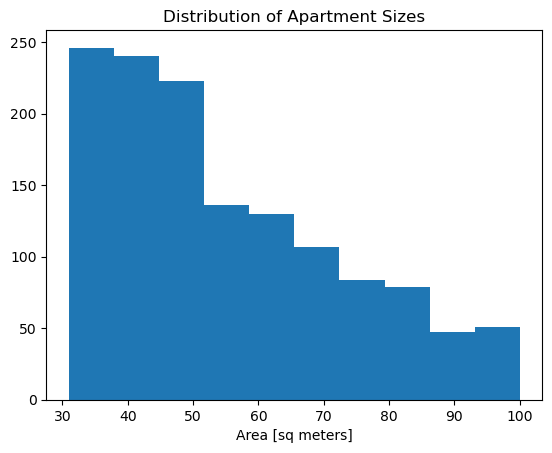

In [45]:
#since we are looking at area and price. we want to look at how distributed the arae is
#ikes! When you see a histogram like the one below, 
#it suggests that there are outliers in your dataset. 
#This can affect model performance — especially in the sorts of linear models we'll learn about in this project. 
#To confirm, let's look at the summary statistics for the "surface_covered_in_m2" feature.

#EXPLORE

plt.hist(df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.title("Distribution of Apartment Sizes");

In [41]:
df.describe()["surface_covered_in_m2"]

count     1635.000000
mean        97.877064
std       1533.057610
min          0.000000
25%         38.000000
50%         50.000000
75%         73.000000
max      62034.000000
Name: surface_covered_in_m2, dtype: float64

In [2]:
#Add to your wrangle function so that it removes observations that are outliers in the "surface_covered_in_m2" column.
#Specifically, all observations should fall between the 0.1 and 0.9 quantiles for "surface_covered_in_m2". WE CHOOSE A QUARNTILE BETWEEN 10 AND 90
#WE WANT TO ELIMINATE TOP 10 PERCENT AND 10 BOTTOM PERCENT
#after i did that it changes.

#OUR DATA IS SKEWEED( SPREAD)
#LOOK AT THE DIFFERNCE BETWEEN MEAN AND MEDIAN
#LOOK AT THE DIFFERENCE BETWEEN MIN AAND MAX
#OUR MEAN IS AROUND 100 AND THE STANDARD DEVIATION(SPREAD AROUND THE 100 IS ABOUT 1533.057610)

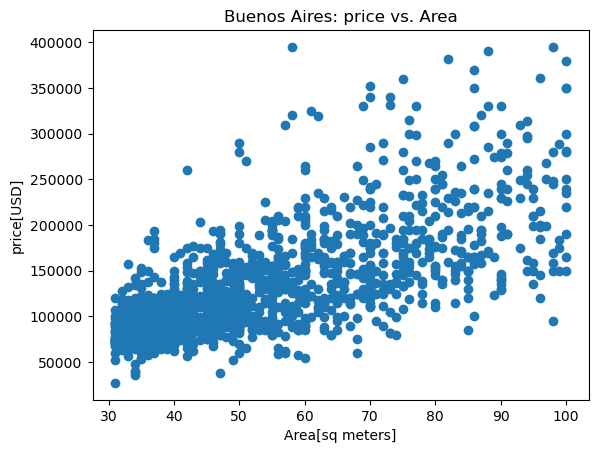

In [47]:
plt.scatter(x=df["surface_covered_in_m2"],y=df["price_aprox_usd"])
plt.xlabel("Area[sq meters]")
plt.ylabel("price[USD]")
plt.title("Buenos Aires: price vs. Area");

In [48]:
#This plot suggests that there's a moderate positive correlation between apartment price and size. 
#This means that if thing we want to predict is price, size will be a good feature to include.

In [49]:
#Split
#A key part in any model-building project is separating your target (the thing you want to predict) from your features 
#(the information your model will use to make its predictions). 
#Since this is our first model, we'll use just one feature: apartment size.



#create the feature matrix named X_train, which you'll use to train your model.
#It should contain one feature only: ["surface_covered_in_m2"]. Remember that your feature matrix should always be two-dimensional.

In [26]:
features = ["surface_covered_in_m2"]
X_train = df[features]
X_train.head(17)

,surface_covered_in_m2
4,70.0
9,42.0
29,54.0
40,42.0
41,50.0
48,74.0
58,32.0
62,50.0
70,52.0
72,71.0


In [51]:
#Now that we have a features, the next step is to create a target. 
#(By the way, you may have noticed that we're adding a _train tag to the variable names for our feature matrix and target vector. 
#This is to remind us that this is the data we'll use to train our model, and not the data we'll use to test it.)



#Create the target vector named y_train, which you'll use to train your model. 
#Your target should be "price_aprox_usd". Remember that, in most cases, your target vector should be one-dimensional.

In [27]:
target = "price_aprox_usd"
y_train = df[target]
y_train.head()

4     129000.0
9      87000.0
29    118000.0
40     57000.0
41     90000.0
Name: price_aprox_usd, dtype: float64

In [54]:
#Build Model
#Baseline
#the first step in building a model is baselining. 
#To do this, ask yourself how you will know if the model you build is performing well?" 
#One way to think about this is to see how a "dumb" model would perform on the same data.
#Some people also call this a naïve or baseline model, but it's always a model makes only one prediction — in this case, 
#it predicts the same price regardless of an apartment's size. So let's start by figuring out what our baseline model's prediction should be.

In [31]:
#Calculate the mean of your target vector y_train and assign it to the variable y_mean
#DUMB MODEL
y_mean = y_train.mean()
y_mean

135527.83871928515

In [32]:
#Now that we have the one prediction that our dumb model will always make, 
#we need to generate a list that repeats the prediction for every observation in our dataset.

y_pred_baseline =[y_mean]*len(y_train)
len(y_pred_baseline)==len(y_train)

True

In [57]:
#add a line to the plot below that shows the relationship between the observations X_train and our dumb model's predictions y_pred_baseline. 
#Be sure that the line color is orange, and that it has the label "Baseline Model"

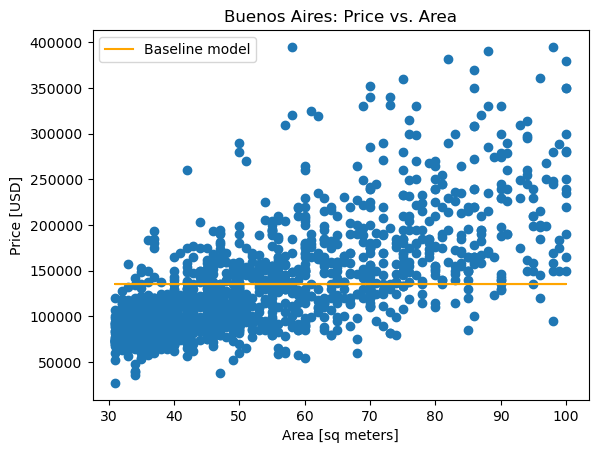

In [33]:
plt.plot(X_train["surface_covered_in_m2"],y_pred_baseline,color="orange",label="Baseline model")
plt.scatter(X_train, y_train)
plt.xlabel("Area [sq meters]")
plt.ylabel("Price [USD]")
plt.title("Buenos Aires: Price vs. Area")
plt.legend();

In [59]:
# THOUGH WE HAVE SOME CORRELATION FROM OUR PREVIOUS PLOT ON CORRELATION,Looking at this visualization, it seems like our baseline model doesn't really follow the trend in the data. 
#But, as a data scientist, you can't depend only on a subjective plot to evaluate a model. You need an exact, mathematically calculate performance metric. 
#There are lots of performance metrics, but the one we'll use here is the mean absolute error.



#Calculate the baseline mean absolute error for your predictions in y_pred_baseline as compared to the true targets in y.

In [34]:
#MAE TAKES TWO ARGUEMENT TRUE VALUE( Y-RAIN) AND PREDICTIVE VALUE(Y-PREDICTIVE BASELINE)

mae_baseline = mean_absolute_error(y_train, y_pred_baseline)

print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 135527.84
Baseline MAE: 45199.46


In [29]:
#mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
#A GOOD MEAN ABOSULUTE ERROR IS SOMEWHERE AROUND ZERO NOT ACTUALLY ZERO.( IF ITS ZERO SOMETHING IS WRONG)
#MAE CAN BE AS BIG AS YOU WANT
#MAE UNIT OF MEASUREMENT IS WHAT THE VALUE IS FOR OUR Y AXIS IS


#print("Mean apt price", round(y_mean, 2)) print("Baseline MAE:", round(mae_baseline, 2))What does this information tell us? 
#If we  predicted(QUESS) that an apartment price is $135,527.84 PRICE FOR ALL PROPERTIES, our predictions would be off by an average of $45,199.46. SO FOR OUR MODEL TO BE USEFUL WE NEED MAE LESS THAN 45199.46

#It also tells us that our model needs to have mean absolute error below $45,199.46 in order to be useful. that is if we quess 135527.8 we wii be off by 45199.46

In [62]:
#The next step in building a model is iterating. 
#This involves building a model, training it, evaluating it, and then repeating the process until you're happy with the model's performance.
#Even though the model we're building is linear, the iteration process rarely follows a straight line. 
#Be prepared for trying new things, hitting dead-ends, and waiting around while your computer does long computations to train your model. ☕️ Let's get started!

#The first thing we need to do is create our model — in this case, one that uses linear regression.

In [63]:
#ITERATE 3 STEPS TO BUILDING MODEL
#1) INSTANTIATE( CREATE A MODEL TO BUILD)
#2TRAIN THE MODEL( WE USE THE FIT METHOD )
#3 USE MODEL TO PREDICT
model =LinearRegression()

#The second thing we need to do is use our data to train our model. Another way to say this is fit our model to the training data.

In [64]:
model.fit(X_train, y_train)

LinearRegression()

In [65]:
#Evaluate
#The final step is to evaluate our model. 
#In order to do that, we'll start by seeing how well it performs when making predictions for data that it saw during training.
#So let's have it predict the price for the houses in our training set.

In [66]:
#Using your model's predict method, 
#create a list of predictions for the observations in your feature matrix X_train.
#Name this array y_pred_training.

In [67]:
#Using your model's predict method, create a list of predictions for the observations in your feature matrix X_train. 
#Name this array y_pred_training.
# WE SEE HOW OUR MODEL PERFORM O

In [68]:
y_pred_training = model.predict(X_train)
y_pred_training[:5]

array([169151.87330223, 106064.44707446, 133101.91545779, 106064.44707446,
       124089.42599668])

In [69]:
#Now that we have predictions, we'll use them to assess our model's performance with the training data.
#We'll use the same metric we used to evaluate our baseline model: mean absolute error. 

In [70]:
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 31248.26


In [72]:
#Good news: Our model beat the baseline by over $10,000! That's a good indicator that it will be helpful in predicting apartment prices.
#But the real test is how the model performs on data that it hasn't seen before, data that we call the test set. In the future, 
#you'll create your own test set before you train your model, but here we'll use one that's pre-made, and we'll evaluate the model using the WQU auto-grader.

In [73]:
#Run the code below to import your test data buenos-aires-test-features.csv into a DataFrame and generate a Series of predictions using your model. 
#Then run the following cell to submit your predictions to the grader

In [80]:
X_test = pd.read_excel(r"C:\Users\User\anaconda3\Lib\site-packages\sklearn\datasets\data\mexico folder\housing-in-buenos-aires1.xlsx")[features]
X_test.dropna(inplace=True)
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    259276.767913
1    281807.991566
2    507120.228094
3    315604.827045
4    169151.873302
dtype: float64

In [81]:
#Communicate Results
#Once your model is built and tested,
#it's time to share it with others. If you're presenting to simple linear model to a technical audience, they might appreciate an equation.
#When we created our baseline model, we represented it as a line. The equation for a line like this is usually written as:

#Equation: y = m*x + b
#Since data scientists often work with more complicated linear models, they prefer to write the equation as:

#Equation: y = beta 0 + beta 1 * x
#Regardless of how we write the equation, we need to find the values that our model has determined for the intercept and and coefficient. Fortunately, all trained models in scikit-learn store this information in the model itself. Let's start with the intercept

In [82]:
#Extract the intercept from your model, and assign it to the variable intercept#
intercept = round(model.intercept_)
print("Model Intercept:", intercept)
assert any([isinstance(intercept, int), isinstance(intercept, float)])

Model Intercept: 11433


In [83]:
#Extract the coefficient associated "surface_covered_in_m2" in your model, and assign it to the variable coefficient.
coefficient =round(model.coef_[0], 2)
print('Model coefficient for "surface_covered_in_m2":', coefficient)
assert any([isinstance(coefficient, int), isinstance(coefficient, float)])

Model coefficient for "surface_covered_in_m2": 2253.12


In [84]:
#Complete the code below and run the cell to print the equation that your model has determined for predicting apartment price based on size
print(f"apt_Price={intercept} +{coefficient} + surface_covered")

apt_Price=11433 +2253.12 + surface_covered


In [85]:
#Equation might work for some technical audiences, but visualization or generally much more effective communication tool — especially for non-technical audiences.
#So let's use the scatter plot we made at the beginning of this lesson and plot the line that that are equation would make.

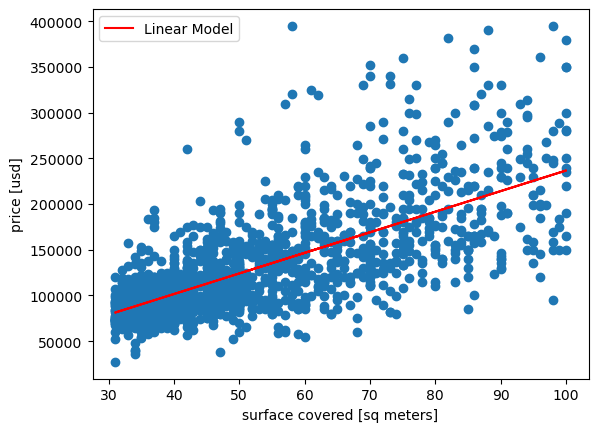

In [86]:
#Add a line to the plot below that shows the relationship between the observations in X_train and your model's predictions y_pred_training.
#Be sure that the line color is red, and that it has the label "Linear Model".

#What's a line plot?



plt.plot(X_train, model.predict (X_train), color="r", label="Linear Model")
plt.scatter(X_train, y_train)
plt.xlabel("surface covered [sq meters]")
plt.ylabel("price [usd]")
plt.legend();

In [ ]:

#This is  our simple model as a line imposed on a 2D scatter plot.